In [2]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.support.ui import WebDriverWait as wait
from bs4 import BeautifulSoup
from tqdm.notebook import tqdm

import numpy as np
import pandas as pd
import re
import sys

# json 파싱
import time
import json
import urllib
import requests

keys = Keys()

In [5]:
# webdriver 자동설정 (M1)
def set_chrome_driver():
    chrome_options = webdriver.ChromeOptions()
    driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()), options=chrome_options)
    return driver

In [14]:
url ='https://smartstore.naver.com/woorisulgallery/products/4980614774'

header = {
     # referer --> 유저가 이전에 있던 위치를 알려주는 거, 안써주면 네이버가 정보 안준다
    'referer': 'https://finance.daum.net/quotes/A005930',
    # 나 기계아니고 사람임~ 내 노트북 정보
    'user_agent' : '내 노트북 정보',
}
#헤더 정보를 넣어주기
resp = requests.get(url, headers = header)

driver = set_chrome_driver()
driver.get(url)
time.sleep(2)

In [15]:
resp

<Response [200]>

'\n<!DOCTYPE html>\n<html lang="ko">\n  <head>\n    <meta charset="utf-8">\n    <meta http-equiv="Cache-Control" content="no-cache, no-store, must-revalidate" >\n    <meta http-equiv="X-UA-Compatible" content="IE=edge"/>\n    <meta name="viewport" content="width=device-width, initial-scale=1">\n    <meta name="description" content="[우리술상회] [우리술상회]  골라담기~전국팔도 우리술 명인주 전통주 선물 맛집 안주 전문쇼핑몰.">\n<meta name="keywords" content="명절선물,설선물,추석선물,가족모임,냠냠맛있는,직장상사선물,직장동료선물,은사님선물,외국인손님선물,리큐르주,감흥로,죽력고,이강주,감흥로,죽력고,이강주,[조선3대명주] 감홍로+죽력고+이강주 유리병 모음,우리술상회">\n<meta property="og:title" content="조선3대명주 감홍로+죽력고+이강주 유리병 모음 개별 케이스+쇼핑백1 리큐르주 일반증류주 : 우리술상회">\n<meta property="og:image" content="https://shop-phinf.pstatic.net/20210904_86/1630738908170l1kFk_JPEG/31874753782189475_1898384978.jpg?type=o1000">\n<meta property="og:description" content="[우리술상회] [우리술상회]  골라담기~전국팔도 우리술 명인주 전통주 선물 맛집 안주 전문쇼핑몰.">\n<meta property="og:type" content="article">\n<meta name="twitter:title" content="조선3대명주 감홍로+죽력고+이강주 유리병 모음 개별 케이스+쇼
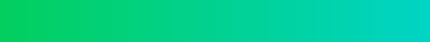
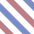

In [16]:
resp.text

In [17]:
# 리뷰 첫 페이지 크롤링
review_list = []
# 한 페이지 당 리뷰 20개
for i in range(0,20):
    html = driver.page_source
    soup = BeautifulSoup(html, "html.parser")
    review = soup.find_all('div',class_='_1YShY6EQ56')
    review = review[i].text
    review = re.sub('[^#0-9a-zA-Zㄱ-ㅣ가-힣 ]',"",review)
    review_list.append(review)
print(review_list)

['평점5pink221019신고한달사용기신랑 생일선물로 사줬었는데 넘 맛있어서 일주일도 안돼서 다 마셔버렸지모예요ㅎㅎ확실히 우리술이 맛도 진하고 목넘김도 부드러운거 같아요감홍로 이강주 죽력고 각각 매력있는 우리술 이었고 또 한번 구매해서 먹어보고싶네요ㅎㅎ포장도 정성스레 이쁘게해주셔서 선물로도 너무 좋은 것 같아요ㅎㅎ특히 부모님 선물해드리면 엄청 좋아하실 것 같은데 다음 생신이나 명절에 선물해드려봐야 겠어요꼬옥 또 구매하러 올게요더보기', '평점5pink220914신고BEST신랑이 조선3대명주 마셔보고 싶다고 해서결혼기념일 선물로 사줬는데 엄청 좋아하네요ㅎㅎ몰래 감춰뒀다가 주려고 했는데 신랑 퇴근할때 집앞에 온 택배를 봐버려서 조금 아쉬웠지만요ㅎㅎㅎ그래도 포장도 어쩜 이렇게 깔끔하고 꼼꼼하게 포장했지 싶을 정도로 완전 꼼꼼하게 되어있고 사은품 전통잔도 너무 이뻐요추석때 감흥로 먼저 같이 마셔봤는데 독한 것 같으면서도 끝맛이 달아요둘이서 한병 딱 기분 좋게 취할 정도의 도수예요신랑이 성분표 보더니 좋은 것만 들어갔네 하더라구요ㅋㅋㅋ남은 두병도 좋은 날 특별한 날 아껴뒀다 먹겠대요ㅎㅎ선물 포장도 깔끔하고 세개 세트 가격대도 좋아서 양가 부모님들께도 나중에 명절이나 생신때 선물로 드릴까해요술 좋아하시는 분들께 비싼 양주나 와인 선물도 물론 좋지만우리 술도 정말 뜻깊고 좋은 선물인 것 같아요더보기', '평점5rkdw221027신고역시 파손이될수 없는 포장 너무 좋습니다', '평점4moon221022신고포장잘되서왔네요 술맛은부드러운데 각술별도수말고큰차이는모르겠네요', '평점5nico221022신고한달사용기명주를 만나게 되서 좋았어요가격때매 자주 마시진 못하겠지만생각나는 맛', '평점5cyi1221102신고가족 모임에 다같이 맛 볼려고 먹어보진 못했어요잔도 2개 주셔서 너무 감사해요또 주문 할께요', '평점4kys1221001신고세가지 세트로 즐길 수 있는 구성이 맘에 드네요 다만 같이 온 잔 세트가 이가 나가거나 바닥 마감이 아쉬운 부분이 있어서 사용하기에는 조금 꺼려집

In [ ]:
# 여러 페이지 크롤링

In [23]:
url ='https://smartstore.naver.com/woorisulgallery/products/5145878745'

header = {
     # referer --> 유저가 이전에 있던 위치를 알려주는 거, 안써주면 네이버가 정보 안준다
    'referer': 'https://finance.daum.net/quotes/A005930',
    # 나 기계아니고 사람임~ 내 노트북 정보
    'user_agent' : '내 노트북 정보',
}
#헤더 정보를 넣어주기
resp = requests.get(url, headers = header)

driver = set_chrome_driver()
driver.get(url)
time.sleep(2)

count = 0
stop = int(input("마지막 페이지 입력: "))

# 1단계 
# 5페이지 까지만 크롤링
step1_btn = ['a:nth-child(2)', 'a:nth-child(3)', 'a:nth-child(4)', 'a:nth-child(5)', 'a:nth-child(6)']
review_list = []

for pagenum in step1_btn:
    wait(driver, 10).until(EC.element_to_be_clickable((By.CSS_SELECTOR, '#REVIEW > div > div._180GG7_7yx > div.cv6id6JEkg > div > div > '+str(pagenum)+''))).click()
    # --> 아래 코드보다는 중복 1개 정도 ?
    # wait(driver, 10).until(EC.element_to_be_clickable((By.CSS_SELECTOR, '#REVIEW > div > div._180GG7_7yx > div.cv6id6JEkg > div > div > '+str(pagenum)+''))).send_keys(keys.ENTER)
    # --> 중복 및 누락이 심함
    for i in range(0,20):
        html = driver.page_source
        soup = BeautifulSoup(html, "html.parser")
        review = soup.find_all('div',class_='_1YShY6EQ56')
        review = review[i].text
        review = re.sub('[^#0-9a-zA-Zㄱ-ㅣ가-힣 ]',"",review)
        review_list.append(review)
print('5 페이지까지 크롤링 완료')

# 2단계 6페이지부터 마지막 페이지 앞까지(?)
next_btn = ['a.fAUKm1ewwo._2Ar8-aEUTq']
while count < stop-6:
    for pagenum in next_btn:
        wait(driver, 10).until(EC.element_to_be_clickable((By.CSS_SELECTOR, '#REVIEW > div > div._180GG7_7yx > div.cv6id6JEkg > div > div > '+str(pagenum)+''))).click()
        for i in range(0,20):
            html = driver.page_source
            soup = BeautifulSoup(html, "html.parser")
            review = soup.find_all('div',class_='_1YShY6EQ56')
            review = review[i].text
            review = re.sub('[^#0-9a-zA-Zㄱ-ㅣ가-힣 ]',"",review)
            review_list.append(review)
    print(f'{count+6} 페이지 크롤링 완료')
    count = count + 1

# 마지막 페이지 리뷰 20개 이하이면 어떻게 처리하지?    

print(len(review_list))


마지막 페이지 입력: 8
5 페이지까지 크롤링 완료
6 페이지 크롤링 완료
7 페이지 크롤링 완료


IndexError: list index out of range

In [24]:
len(review_list)

151